In [1]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [2]:
region_footprint = pd.read_csv("../outputs/stats_region_footprint.tsv", sep="\t")
region_count = pd.read_csv("../outputs/stats_region_count.tsv", sep="\t")

In [9]:
def plot_region_footprint(
    df, ax, metric, region="transcript", legend=False, legend_outside=False, xlabel=False
):

    df = df.query(f"region == '{region}'")

    colors = {
        "constrained": C.red,
        "unconstrained": C.grey,
        "indeterminate": adjust_lightness(C.grey, 0.5),
    }
    labels = {
        "transcript": "Transcript",
        "nmd_target": "NMD Target",
        "long_exon": "Long Exon",
        "distal_nmd": "Distal",
        "start_proximal": "Start Proximal",
    }

    n = len(df)
    y = np.arange(n)
    x = df[metric]

    b = ax.barh(
        y=y * 1 / n,
        height=1 / (n + 1),
        width=x,
        label=df["constraint"].str.capitalize(),
        color=df["constraint"].map(colors),
    )
    ax.bar_label(b, fmt="{:,.0f}", padding=7)

    ax.set_yticks(
        ticks=[y.max() / (2 * n)],
        labels=[labels[region]],
    )
    ax.tick_params(axis="y", length=0, pad=7)

    if xlabel:
        ax.set_xlabel(xlabel)

    if legend:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles[::-1],
            labels[::-1],
            labelspacing=1,
            loc="center right",
            handleheight=n / 2,
        )
        
    if legend_outside:
        ax.legend(
            handles[::-1],
            labels[::-1],
            labelspacing=1,
            handleheight=n / 2,
            bbox_to_anchor = (1.05, 0.5),
            loc="center left",
        )

    return None

In [10]:
cm = 1 / 2.54

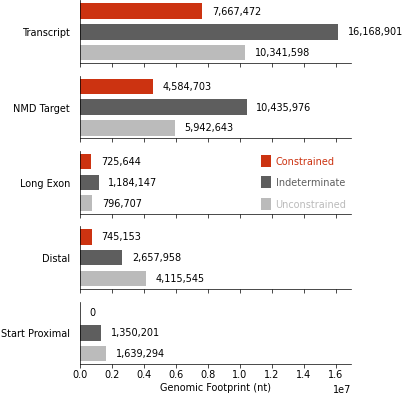

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(8.9 * cm, 12 * cm), sharex=True)

plot_region_footprint(region_footprint, axs[0], "size", "transcript")
plot_region_footprint(
    region_footprint,
    axs[1],
    "size",
    "nmd_target",
)
plot_region_footprint(region_footprint, axs[2], "size", "long_exon", legend=True)
plot_region_footprint(region_footprint, axs[3], "size", "distal_nmd")
plot_region_footprint(
    region_footprint, axs[4], "size", "start_proximal", xlabel="Genomic Footprint (nt)"
)

plt.savefig("../plots/fig_s1_region_footprints.svg", format="svg")

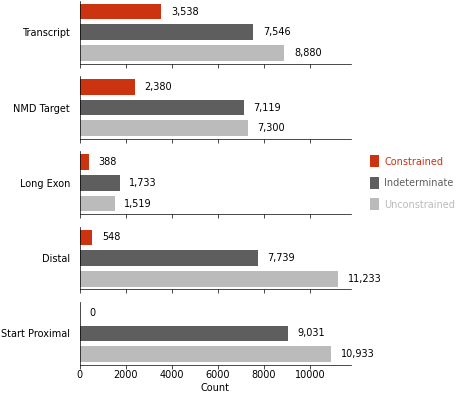

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(8.9 * cm, 12 * cm), sharex=True)

plot_region_footprint(region_count, axs[0], "n", "transcript")
plot_region_footprint(
    region_count,
    axs[1],
    "n",
    "nmd_target",
)
plot_region_footprint(region_count, axs[2], "n", "long_exon", legend=True, legend_outside=True)
plot_region_footprint(region_count, axs[3], "n", "distal_nmd")
plot_region_footprint(region_count, axs[4], "n", "start_proximal", xlabel="Count")

plt.savefig("../plots/fig_s1_region_counts.svg", format="svg")